In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

from scipy.optimize import curve_fit

import gm2
import trfp
import plotting_functions as plt2
import analysis_helper as helper
import helper_function_candidates as helper_old

Welcome to JupyROOT 6.12/04


In [2]:
vtm_dict = {'60hr':['vtm_1'],
            '9day':['vtm_1', 'vtm_2', 'vtm_3', 'vtm_4'],
            'endgame':['vtm_2', 'vtm_3', 'vtm_4', 'vtm_5', 'vtm_6'],
            'highkick':['vtm_1', 'vtm_2']}

In [3]:
averages = np.zeros([12,5])
errors = np.zeros([12,5])
ii = 0

for run in vtm_dict:
    for vtm in vtm_dict[run]:

        bloch_file = 'utility_files/bloch_unblind_'+run+'_'+vtm+'.txt'
        purcell_file = 'utility_files/'+run+'_vtms_unblinded_2020-04-15_'+vtm+'.csv'

        bloch = np.loadtxt(bloch_file, delimiter=',')
        purcell = np.loadtxt(purcell_file, skiprows=1, delimiter=',')

        bloch[:,0] = np.round(bloch[:,0], -1)
        bloch_df = pd.DataFrame(bloch[:,1:], index=bloch[:,0])

        averages[ii, 0] = np.mean(purcell[:,0])
        averages[ii, 1] = np.mean(bloch_df.loc[purcell[:,0]][0] - purcell[:,1])
        averages[ii, 2] = np.mean(bloch_df.loc[purcell[:,0]][2] - purcell[:,2])
        averages[ii, 3] = np.mean(bloch_df.loc[purcell[:,0]][4] - purcell[:,3])
        averages[ii, 4] = np.mean(bloch_df.loc[purcell[:,0]][6] - purcell[:,5])

        errors[ii, 0] = np.mean(purcell[:,0])
        errors[ii, 1] = np.std(bloch_df.loc[purcell[:,0]][0] - purcell[:,1])
        errors[ii, 2] = np.std(bloch_df.loc[purcell[:,0]][2] - purcell[:,2])
        errors[ii, 3] = np.std(bloch_df.loc[purcell[:,0]][4] - purcell[:,3])
        errors[ii, 4] = np.std(bloch_df.loc[purcell[:,0]][6] - purcell[:,5])
        
        ii = ii + 1

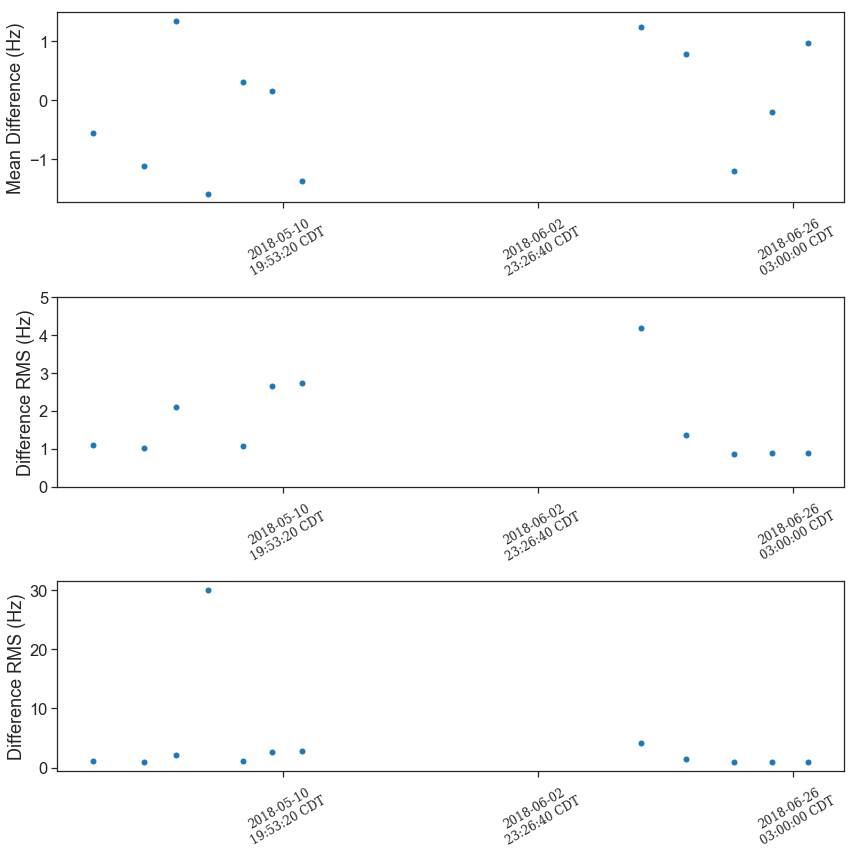

In [10]:
fig, axs = plt.subplots(3,1)

axs[0].plot(averages[:,0], averages[:,1], '.', markersize=10)
axs[0].set_ylabel('Mean Difference (Hz)')
axs[1].plot(errors[:,0], errors[:,1], '.', markersize=10)
axs[1].set_ylim([0,5])
axs[1].set_ylabel('Difference RMS (Hz)')
axs[2].plot(errors[:,0], errors[:,1], '.', markersize=10)
axs[2].set_ylabel('Difference RMS (Hz)')

plt2.plt_unix_time_to_CST(axs[0])
plt2.plt_unix_time_to_CST(axs[1])
plt2.plt_unix_time_to_CST(axs[2])

fig.set_size_inches(12,12)
fig.tight_layout()

-0.10666744221435555
1.0103130840237915
2.9140029163928594


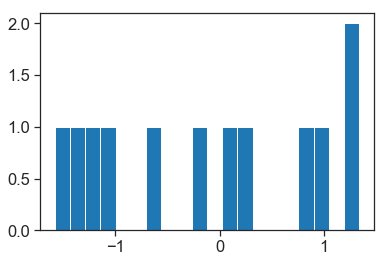

In [16]:
plt.hist(averages[:,1], bins=20)
print np.mean(averages[:,1])
print np.std(averages[:,1])
print np.max(averages[:,1]) - np.min(averages[:,1])